In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import requests
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 500)

In [2]:
file_path = 'madden_rankings.csv'
madden_data = pd.read_csv(file_path)

filtered_data = madden_data[['Full Name', 'Position', 'Team', 'totalSalary', 'overall_rating']]

scaler = MinMaxScaler(feature_range=(1, 100))
filtered_data['normalized_salary'] = scaler.fit_transform(filtered_data[['totalSalary']])

filtered_data['value'] = round(filtered_data['overall_rating'] / filtered_data['normalized_salary'],3)
top3_by_position = filtered_data.groupby('Position').apply(lambda x: x.nlargest(3, 'value')).reset_index(drop=True)

top3_by_position

,Full Name,Position,Team,totalSalary,overall_rating,normalized_salary,value
0,Jason Kelce,C,Eagles,1120000,90,1.371146,65.639
1,Jon Feliciano,C,Giants,500000,72,1.100428,65.429
2,Ethan Pocic,C,Browns,500000,70,1.100428,63.612
3,Patrick Peterson,CB,Vikings,500000,78,1.100428,70.882
4,Troy Hill,CB,Rams,500000,78,1.100428,70.882
5,Anthony Averett,CB,Raiders,500000,76,1.100428,69.064
6,Solomon Thomas,DT,Jets,340000,74,1.030565,71.805
7,Derrick Nnadi,DT,Chiefs,500000,78,1.100428,70.882
8,Matthew Ioannidis,DT,Panthers,500000,78,1.100428,70.882
9,Andy Janovich,FB,Texans,750000,78,1.209588,64.485


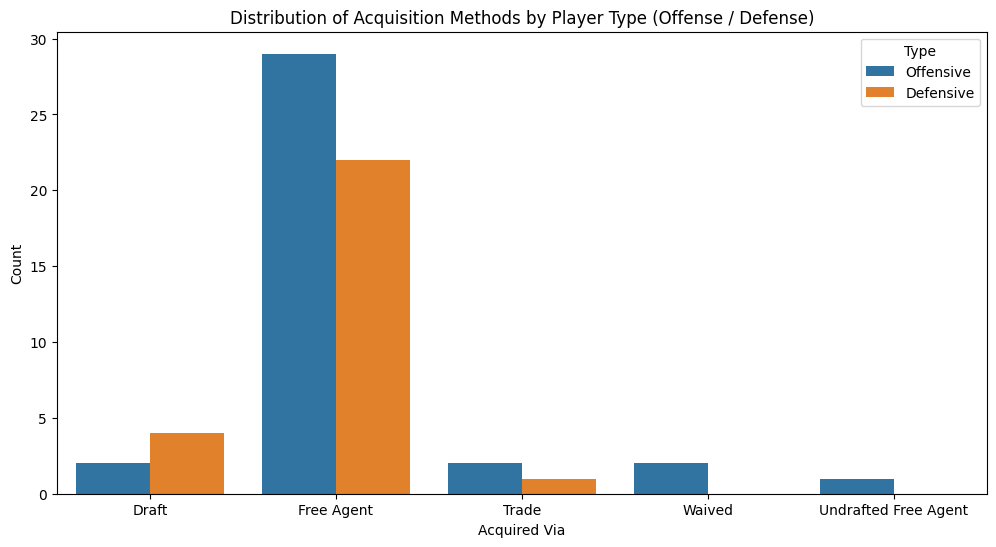

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

df2 = pd.read_csv('top3_by_position.csv')
df2

position_type_mapping = {
    'C': 'Offensive', 'FB': 'Offensive', 'HB': 'Offensive', 'K': 'Offensive', 
    'LG': 'Offensive', 'LT': 'Offensive', 'P': 'Offensive', 'QB': 'Offensive', 
    'RG': 'Offensive', 'RT': 'Offensive', 'TE': 'Offensive', 'WR': 'Offensive', 
    'CB': 'Defensive', 'DT': 'Defensive', 'FS': 'Defensive', 'LE': 'Defensive', 
    'LOLB': 'Defensive', 'MLB': 'Defensive', 'RE': 'Defensive', 'ROLB': 'Defensive', 
    'SS': 'Defensive'
}

df2['type'] = df2['Position'].map(position_type_mapping)

plt.figure(figsize=(12, 6))
sns.countplot(data=df2, x='Acquired Via', hue='type')
plt.title('Distribution of Acquisition Methods by Player Type (Offense / Defense)')
plt.xlabel('Acquired Via')
plt.ylabel('Count')
plt.legend(title='Type')
plt.show()

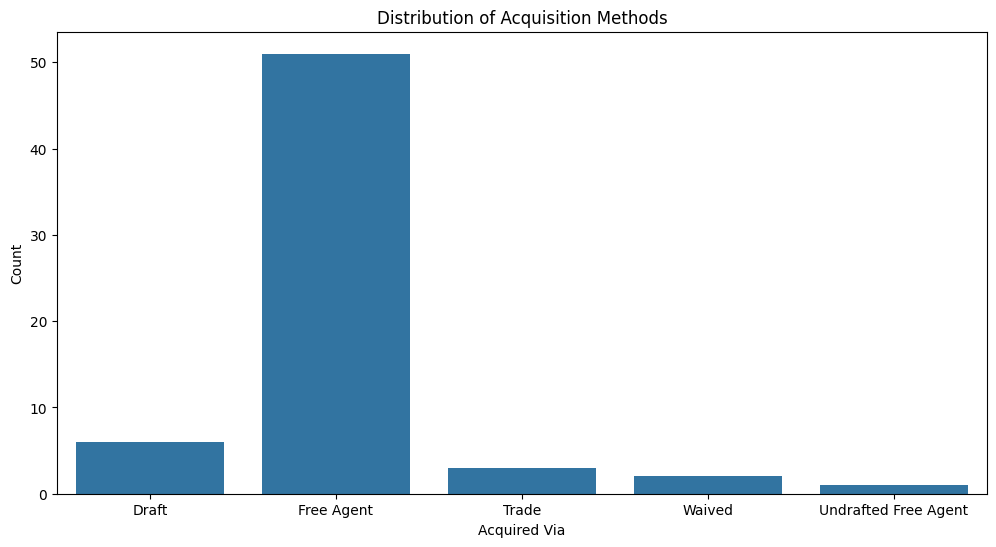

In [4]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df2, x='Acquired Via')
plt.title('Distribution of Acquisition Methods')
plt.xlabel('Acquired Via')
plt.ylabel('Count')
plt.show()